In [1]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

In [2]:
dbname='stockdata.db'
def selData(whr=' where SIDX=0'):   # whr은 쿼리문으로 어떤 데이터 가져올지 이야기.
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [3]:
# 028150 은 gs 홈쇼핑임
whr ='where SDAY>20200101 and S_CODE="028150" order by SDAY asc limit 250'
res=selData(whr)  # type(res) = list임 
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfgs=pd.DataFrame(data=res, columns=cols) # list를 가지고 dataframe만듦
dfgs.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,148600,148600,146400,146500,14920
1,20200103,148200,148200,145800,145800,16373
2,20200106,145700,146400,143000,143000,16978
3,20200107,142700,144400,141200,142000,12613
4,20200108,141800,141800,138100,139400,21254


In [4]:
# 똑같은 코드. (회사만 다름) 03570은 cjenm임
whr='where SDAY>20200101 and S_CODE="035760" order by SDAY  asc limit 250'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df=pd.DataFrame(data=res,columns=cols)
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,159300,159400,151000,155600,125376
1,20200103,155800,157500,153100,154700,98855
2,20200106,153000,153900,150200,150200,78272
3,20200107,150300,154600,150300,154600,65431
4,20200108,152700,153200,150700,151300,75841


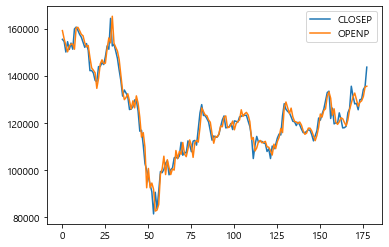

In [5]:
sels=['CLOSEP','OPENP']
df[sels].plot()
#plt.xlim(50,75)   # 이런거로 조정 가능
#plt.ylim(50000,70000)
plt.show()
# 이 그래프는 open가격 close가격 그린 것임 

# 이동평균선
* 주가 기술분석
 - 이동평균선 분석은 주가 기술분석의 핵심임 
* 단기 이평선(5일 이평선) 장기 이평선(30일 이평선)을 설정
 - 5일 동안의 평균 / 30일 동안의 평균을 낸 것임
* 장단기 이평선을 분석
 - 보면서 비교함
* 골든크로스 (단기 이평선이 장기 이평선을 아래서 위로 통과)
* 데드크로스 (단기 이평선이 장기 이평선을 위에서 아래로 통과)
* 마케팅의 시장평가 지점을 지정

In [6]:
def makeMV(baseday=5, basedata=df['CLOSEP']) :
    res =[]
    # 초기화하는 거 res 빈 리스트로. 위에서 만든 res 말고.
    for i in range(baseday-1) :
        res.append(0)
    # 이동평균 데이터 만들기
    n = len(basedata) - (baseday-1)   #총 basedata에서 그 맨 처음 부분은 없으니까 빼는것임 ok (baseday일치 평균이므로 첫 며칠은 값 없음.)
    print("총 데이터수 :", len(basedata), "초기화 안되고 채워야할 부분:",n)
    for i in range(n) :
        mvdata =np.average(basedata[i:i+baseday]) #mvdata에 baseday 일 수 만큼 평균을 넣음. mvdata는 그냥 값 하나로 나옴 (CLOSEP의 5개 average)
        res.append(mvdata)   # res = [0,0,0 .....] <-baseday-1개의 0 이 있는 곳에 mvdata값을 추가함
    return res    

In [7]:
#  makeMV(n)은 df(cjenm)의 CLOSEP가지고 만든 값임!! (dfgs - gs아님)
df['MV5'] =makeMV(5)  # df는 위에서 종목코드035760 가져온 데이터.
df['MV30'] =makeMV(30) #df에 칼럼 새롭게 넣음. 'MV5'칼럼은 앞4개까진 0이고 그 뒤부터 'CLOSEP'의 5개씩 값 평균이 들어감 'MV30'은 29개까지 0이고.
df['gsClose']=dfgs['CLOSEP'] #dfgs 는 종목코드028150 가져온 데이터. 이것의 종가 CLOSEP를 따옴
df.head()                       #dfgs가져온건 이 값들을 합쳐서 비교를 쉽게하려고 그러는 것 같음

총 데이터수 : 178 초기화 안되고 채워야할 부분: 174
총 데이터수 : 178 초기화 안되고 채워야할 부분: 149


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,146500
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,145800
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,143000
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,142000
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,139400


# 경쟁사 분석
* 동종 유사 주가의 경쟁사 분석을 통해 시장기준 주가 분석

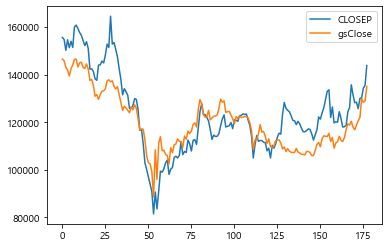

In [8]:
df[['CLOSEP','gsClose']].plot()  # 두 종목의 CLOSEP를 비교할 수 있음. 얼추비슷한 가격에 추세도 비슷
#plt.xlim(0,10)  /  plt.ylim(150000,170000)  원하면 옵션 설정 가능
plt.legend()   # legend는 graph의 element를 설명하기 위한 코드라고 함.
plt.show()


# CLOSEP는 cjenm 이고 , gsClose는 gs홈쇼핑임


### 장단기 크로스 포인트 분석
* 주가 장단기 이평선에 관한 크로스 포인트 분석
* 이를 통해 시장에 반영된 마케팅 기준선을 부여

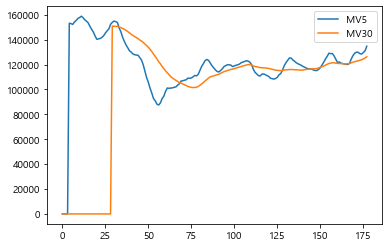

In [9]:
df[['MV5','MV30']].plot()  # MV5, MV30 그래프 그림. 
#plt.xlim(0,10) 
#plt.ylim(150000,170000)  마찬가지로 옵션
plt.legend()
plt.show()

In [10]:
short =df['MV5']  #type은 Series
long = df['MV30'] # 각각 단기 , 장기 데이터
res = []
longday = 30
for i in range(longday) :
    res.append(0)    # res는 리스트이고, 앞30개가 0임.

for i in range(longday, len(short)) : 
    if(short[i] > long[i]) :
        res.append(1)   #res는 앞 30개가 0이고, 그 다음부터 1이나 -1넣음
    else :
        res.append(-1)
        
df['holdPos'] = res
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose,holdPos
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,146500,0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,145800,0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,143000,0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,142000,0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,139400,0


C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


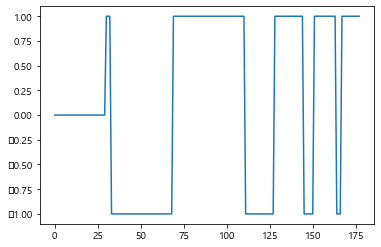

In [11]:
plt.plot(res)  # 0 , 1, -1 그래프

#### 성장동력과 크로스포인트와의 관계
* 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
* 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득

C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


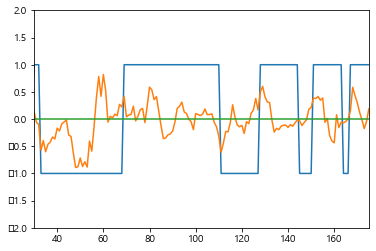

In [12]:
baseData =df['MV5']   # type은 Series임
res=[1]
for i in range(1,len(baseData)) :
    c =((baseData[i]/baseData[i-1])-1)*20  # c가 뭐인진 모르겠음. 증감율 같긴한데.. 1을 왜 뺀건지 잘..
    res.append(c)
df['holdPos'].plot()
plt.plot(res)
plt.plot([0,175],[0,0])
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()

### 캔들차트 분석
* 시가 고가 저가 종가 를 분석하여 마케팅의 적시적 효과를 보기 위함
* <img  src="candle.png"  />

 - 1)
!pip install mplfinance
 - 2)
!pip install mpl_finance
!pip install --upgrade mplfinance

In [13]:
from mpl_finance import candlestick_ohlc

C:\Users\ASIA\Anaconda3\envs\sjpark_environment\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


# 캔들차트 패키지로 그리기 


In [101]:
#OPENP	HIGHP	LOWP	CLOSEP	VOL	
lMin=30
lMax=70
cols=['OPENP','HIGHP','LOWP','CLOSEP'] # --->이 순서가 캔들차트를 표현하는 순서같음. OPENP과 CLOSEP를 반대로 넣으면 그래프 색깔이 반대로 됨.(상향 하향 반대) 
cdata=df[cols].values[lMin:lMax]      #ndarray 형태 : (40,4)
voldata=df['VOL'].values[lMin:lMax]   # (40,) 
days=df['SDAY'].values[lMin:lMax]    # (40,) 형태이고 , SDAY에서 lMin~lMax까지 뽑은것
xtic=np.arange(0,len(days),step=3)   # ndarray고 (14,) 형태 / step ->> xtic은 0,3,6,9 ...
xdays=[days[i] for i in xtic]     # days데이터에서 0번째, 3번째 , 6번째 ... 등
xdays

[20200217,
 20200220,
 20200225,
 20200228,
 20200304,
 20200309,
 20200312,
 20200317,
 20200320,
 20200325,
 20200330,
 20200402,
 20200407,
 20200410]

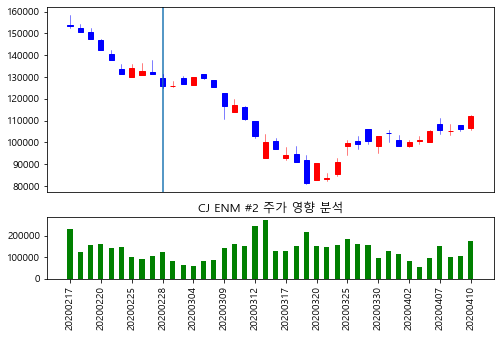

In [106]:
# 그림비율
fig=plt.figure(figsize=(8,5))
# 그리드 2행 1열짜리 높이비율 3:1로 생성  ---> 위아래로 두 개 생성
gs=gridspec.GridSpec(2,1,height_ratios=[3,1])  
axis=[]
#축 선정
axis.append(plt.subplot(gs[0]))
# axis[0]을 그리드 공유  .. 이해 x
axis.append(plt.subplot(gs[1],sharex=axis[0]))
# 공유x축 표시 없애기  .. 이해 x
axis[0].get_xaxis().set_visible(False)  # 증감그래프 x축 보이기 False
# 세로 선으로 쫙 그어줌. ok
axis[0].axvline(x=9,label="기생충")
# 캔들스틱용 데이터 만들기
x=np.arange(len(cdata))  # 0~39 까지 arange나옴
xa= np.reshape(x,(-1,1))   # 이건 tranpose하는 거 (행열바꿈)
ohlc=np.hstack((xa,cdata))  # ohlc (40,5) 형태. (xa가 (40,1)이고 cdata가(40,4) 두개 그냥합침)
#캔들스틱 그리기
candlestick_ohlc(axis[0], ohlc,width=0.5,colorup='r',colordown='b')   # axis[0]이 두 표 중에서 윗 칸에 그리라는 말임
#거래량 그래프
axis[1].bar(x,voldata,color='g',width=0.5)   # axis[1]은 아랫쪽에 그리라는거 .  voldata는 'VOL'을 lMin~lMax 인덱스 뽑은거
plt.title("CJ ENM #2 주가 영향 분석")   # 이름지정
plt.xticks(xtic,xdays,rotation=90)    # rotation은 간격 변화 (초록색 그래프)
plt.savefig('cchart_cjenm.png')   # 이미지를 저장함